<a href="https://colab.research.google.com/github/Lavan1999/Dataset-10_ExamGpa_OLS/blob/main/10_OLS_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Machine Learning
import statsmodels.api as sm

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler


# **DataFrame**

In [ ]:
df = pd.read_csv("/content/slr.csv")

In [ ]:
df.head()

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


# **DataFrame observation**


Supervised [Classification / Regression] (or) Unsupervised [Clustering / Association]

Dependent column

Independent column

Continuous column

Category column

In [ ]:
# Dependent - GPA
# Independent - Exam

#continuous_columns = Exam, GPA

#supervised regression

# **Data cleaning using pandas**


Handling Null Values

Handling Duplicates

Data Type Conversion

Standardizing or Normalizing Data

Handling Text Data

Handling Date and Time Data

Handling Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exam    84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [ ]:
df.isnull().sum()

Exam    0
GPA     0
dtype: int64

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

In [ ]:
df.corr()

,Exam,GPA
Exam,1.000000,0.637184
GPA,0.637184,1.000000


In [ ]:
#central limit theorem
#Exam
population = df.Exam.values
sample_mean = []
for i in range(15):
  sample = np.random.choice(population,20)
  sample_mean.append(sample.mean())
np.mean(sample_mean), population.mean()

(1836.2066666666665, 1845.2738095238096)

In [ ]:
#central limit theorem
#GPA
population = df.GPA.values
sample_mean = []
for i in range(15):
  sample = np.random.choice(population,20)
  sample_mean.append(sample.mean())
np.mean(sample_mean), population.mean()

(3.309866666666667, 3.330238095238095)

In [ ]:
#2-Tailed Test
h0 = 0
ha = 0
for i in range(20):
  sample_1 = df.Exam.sample(frac = 0.05)
  sample_2 = df.GPA.sample(frac = 0.05)
  t_test, p_value = stats.ttest_ind(sample_1, sample_2)

  if p_value > 0.05:
    h0 += 1
  else:
    ha += 1

print(f"H0 acceped : {h0}, H0 regected {ha}")

H0 acceped : 0, H0 regected 20


# **Data Visualization**

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

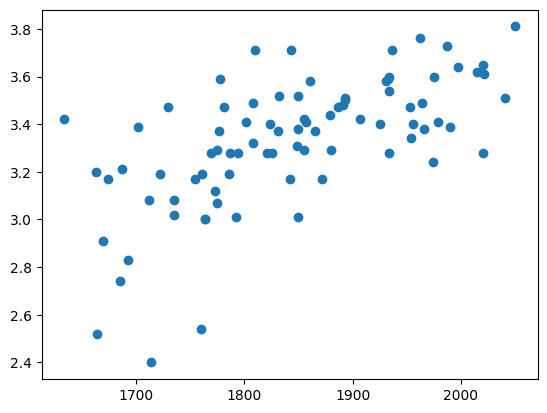

In [ ]:
plt.scatter(x = df.Exam, y = df.GPA, )
plt.show()

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

In [ ]:
df.head()

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
x1 = df.Exam
y = df.GPA
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
#y = B0 + B1x1

In [ ]:
yhat = result.params[0] + result.params[1]*x1
yhat

0     3.112890
1     3.030105
2     3.189051
3     3.064875
4     3.078120
        ...   
79    3.480452
80    3.271836
81    3.564892
82    3.523500
83    3.669201
Name: Exam, Length: 84, dtype: float64

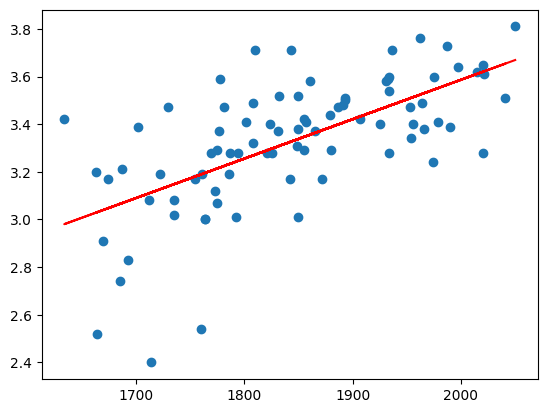

In [ ]:
plt.scatter(x1, y)
plt.plot(x1,yhat, color = 'red')
plt.show()